# Set Main Classes: Location, Field, and Drunk

In [1]:
class Location(object):
    def __init__(self, x, y):
        """x and y are floats"""
        self.x = x
        self.y = y
    
    def move(self, deltaX, deltaY):
        """deltaX and deltaY are floats"""
        return Location(self.x + deltaX, self.y + deltaY)
    
    def getX(self):
        return self.x
    
    def getY(self):
        return self.y
    
    def distFrom(self, other):
        ox = other.x
        oy = other.y
        xDist = self.x - ox
        yDist = self.y - oy
        return (xDist**2 + yDist**2)**0.5
    
    def __str__(self):
        return '<' + str(self.x) + ', ' + str(self.y) + '>'

In [2]:
class Field(object):
    def __init__(self):
        self.drunks = {}
    
    def addDrunk(self, drunk, loc):
        if drunk in self.drunks:
            raise ValueError('Duplicate drunk')
        else:
            self.drunks[drunk] = loc
    
    def getLoc(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        return self.drunks[drunk]
    
    def moveDrunk(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        xDist, yDist = drunk.takeStep()
        currentLocation = self.drunks[drunk]
        self.drunks[drunk] = currentLocation.move(xDist, yDist)

In [3]:
class Drunk(object):
    def __init__(self, name = None):
        self.name = name
    def __str__(self):
        return 'This drunk is named ' + self.name

# Setup Different Kinds of Subclass for Drunk

In [4]:
import random

class UsualDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(0.0,1.0),(0.0,-1.0),(1.0,0.0),(-1.0,0.0)]
        return random.choice(stepChoices)

class ColdDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(0.0,0.9),(0.0,-1.1),(1.0,0.0),(-1.0,0.0)]
        return random.choice(stepChoices)

# Simulate one walk

In [5]:
def walk(f, d, numSteps):
    """Assumes: f a Field, d a Drunk in f, and
       numSteps an int >= 0.
       Moves d numSteps times; returns the distance
       between the final location and the location
       at the start of the walk."""
    start = f.getLoc(d)
    for s in range(numSteps):
        f.moveDrunk(d)
    return start.distFrom(f.getLoc(d))

# Simulate Multiple Walks

In [49]:
def simWalks(numSteps, numTrials, dClass):
    """Assumes numSteps an int >= 0, numTrials an 
       int > 0, dClass a subclass of Drunk
       Simulates numTrials walks of numSteps steps
       each. Returns a list of the final distances
       for each trial"""
    Homer = dClass()
    origin = Location(1, 2)
    distances = []
    for t in range(numTrials):
        f = Field()
        f.addDrunk(Homer, origin)
        distances.append(round(walk(f, Homer, numSteps), 1))
    return distances

# Setup Simulation function and run function, run sanity check

In [50]:
def drunkTest(walkLengths, numTrials, dClass):
    """Assumes walkLengths a sequence of ints >= 0
       numTrials an int > 0,
       dClass a subclass of Drunk
       For each number of steps in walkLengths,
       runs simWalks with numTrials walks and prints results"""
    for numSteps in walkLengths:
        distances = simWalks(numSteps, numTrials, dClass)
        print(dClass.__name__, 'random walk of', numSteps, 'steps')
        print(' Mean =', round(sum(distances)/len(distances), 4))
        print(' Max =', max(distances), 'Min =', min(distances))
    

In [51]:
random.seed(0)
drunkTest((10, 100, 1000, 10000), 100, UsualDrunk)

UsualDrunk random walk of 10 steps
 Mean = 2.863
 Max = 7.2 Min = 0.0
UsualDrunk random walk of 100 steps
 Mean = 8.296
 Max = 21.6 Min = 1.4
UsualDrunk random walk of 1000 steps
 Mean = 27.297
 Max = 66.3 Min = 4.2
UsualDrunk random walk of 10000 steps
 Mean = 89.241
 Max = 226.5 Min = 10.0


In [12]:
drunkTest((0, 1, 2), 100, UsualDrunk)

UsualDrunk random walk of 0 steps
 Mean = 0.0
 Max = 0.0 Min = 0.0
UsualDrunk random walk of 1 steps
 Mean = 1.0
 Max = 1.0 Min = 1.0
UsualDrunk random walk of 2 steps
 Mean = 1.28
 Max = 2.0 Min = 0.0


# Compare different drunks using Simulation

In [13]:
def simAll(drunkKinds, walkLengths, numTrials):
    for dClass in drunkKinds:
        drunkTest(walkLengths, numTrials, dClass)

In [14]:
random.seed(0)
simAll((UsualDrunk, ColdDrunk), (1, 10, 100, 1000, 10000), 100)

UsualDrunk random walk of 1 steps
 Mean = 1.0
 Max = 1.0 Min = 1.0
UsualDrunk random walk of 10 steps
 Mean = 2.948
 Max = 7.2 Min = 0.0
UsualDrunk random walk of 100 steps
 Mean = 8.453
 Max = 21.6 Min = 1.4
UsualDrunk random walk of 1000 steps
 Mean = 27.138
 Max = 72.8 Min = 1.4
UsualDrunk random walk of 10000 steps
 Mean = 90.661
 Max = 222.9 Min = 5.1
ColdDrunk random walk of 1 steps
 Mean = 0.996
 Max = 1.1 Min = 0.9
ColdDrunk random walk of 10 steps
 Mean = 2.788
 Max = 7.1 Min = 0.2
ColdDrunk random walk of 100 steps
 Mean = 9.602
 Max = 22.9 Min = 0.4
ColdDrunk random walk of 1000 steps
 Mean = 53.525
 Max = 108.3 Min = 7.3
ColdDrunk random walk of 10000 steps
 Mean = 495.128
 Max = 654.6 Min = 323.9


# Use graph to show different styles of Drunk

# Setup Styles

In [16]:
class styleIterator(object):
    def __init__(self, styles):
        self.index = 0
        self.styles = styles
    
    def nextStyle(self):
        result = self.styles[self.index]
        if self.index == len(self.styles) - 1:
            self.index = 0
        else:
             self.index += 1
        return result

# Get mean distance for specific drunk walking specific steps

In [17]:
def simDrunk(numTrials, dClass, walkLengths):
    meanDistances = []
    for numSteps in walkLengths:
        print('Starting simulation of', numSteps, 'steps')
        trials = simWalks(numSteps, numTrials, dClass)
        mean = sum(trials)/len(trials)
        meanDistances.append(mean)
    return meanDistances

Starting simulation of UsualDrunk
Starting simulation of 10 steps
Starting simulation of 100 steps
Starting simulation of 1000 steps
Starting simulation of 10000 steps
Starting simulation of ColdDrunk
Starting simulation of 10 steps
Starting simulation of 100 steps
Starting simulation of 1000 steps
Starting simulation of 10000 steps


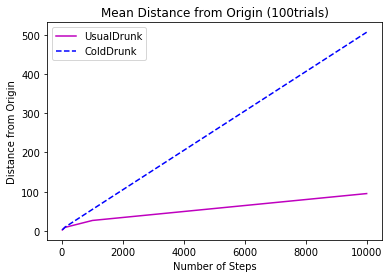

In [18]:
import pylab as plt

def simAll2(drunkKinds, walkLengths, numTrials):
    styleChoice = styleIterator(('m-', 'b--', 'g-.'))
    for dClass in drunkKinds:
        curStyle = styleChoice.nextStyle()
        print('Starting simulation of', dClass.__name__)
        means = simDrunk(numTrials, dClass, walkLengths)
        plt.plot(walkLengths, means, curStyle, label = dClass.__name__)
    plt.title('Mean Distance from Origin (' + str(numTrials) + 'trials)')
    plt.xlabel('Number of Steps')
    plt.ylabel('Distance from Origin')
    plt.legend(loc = 'best')

numSteps = (10, 100, 1000, 10000)
simAll2((UsualDrunk, ColdDrunk), numSteps, 100)

# Graph with every location for each time Drunk stops

In [19]:
def getFinalLocs(numSteps, numTrials, dClass):
    locs = []
    d = dClass()
    for t in range(numTrials):
        f = Field()
        f.addDrunk(d, Location(0, 0))
        for s in range(numSteps):
            f.moveDrunk(d)
        locs.append(f.getLoc(d))
    return locs

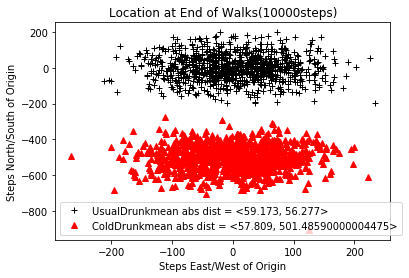

In [20]:
def plotLocs(drunkKinds, numSteps, numTrials):
    styleChoice = styleIterator(('k+','r^', 'mo'))
    for dClass in drunkKinds:
        locs = getFinalLocs(numSteps, numTrials, dClass)
        xVals, yVals = [], []
        for l in locs:
            xVals.append(l.getX())
            yVals.append(l.getY())
        xVals = plt.array(xVals)
        yVals = plt.array(yVals)
        meanX = sum(abs(xVals))/float(len(xVals))
        meanY = sum(abs(yVals))/float(len(yVals))
        curStyle = styleChoice.nextStyle()
        plt.plot(xVals,yVals,curStyle,label=dClass.__name__+ 'mean abs dist = <'
                + str(meanX) + ', '+ str(meanY) + '>')

    plt.title('Location at End of Walks(' + str(numSteps) + 'steps)')
    plt.xlabel('Steps East/West of Origin')
    plt.ylabel('Steps North/South of Origin')
    plt.legend(loc = 'best')

plotLocs((UsualDrunk, ColdDrunk), 10000, 1000)

# Add Wormholes to the field and trace Drunk walking

In [21]:
class OddField(Field):
    def __init__(self, numHoles = 1000, xRange = 100, yRange = 100):
        Field.__init__(self)
        self.wormholes = {}
        for w in range(numHoles):
            x = random.randint(-xRange, xRange)
            y = random.randint(-yRange, yRange)
            newX = random.randint(-xRange, xRange)
            newY = random.randint(-yRange, yRange)
            newLoc = Location(newX, newY)
            self.wormholes[(x, y)] = newLoc
    
    def moveDrunk(self, drunk):
        Field.moveDrunk(self, drunk)
        x = self.drunks[drunk].getX()
        y = self.drunks[drunk].getY()
        if(x, y) in self.wormholes:
            self.drunks[drunk] = self.wormholes[(x, y)]

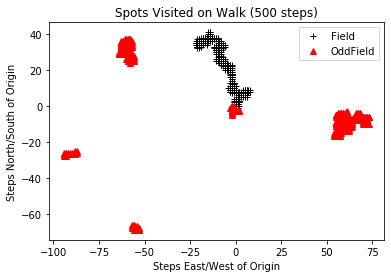

In [24]:
def traceWalk(fieldKinds, numSteps):
    styleChoice = styleIterator(('k+','r^', 'mo'))
    for fClass in fieldKinds:
        d = UsualDrunk()
        f = fClass()
        f.addDrunk(d, Location(0, 0))
        locs = []
        for s in range(numSteps):
            f.moveDrunk(d)
            locs.append(f.getLoc(d))
        xVals, yVals = [], []
        for l in locs:
            xVals.append(l.getX())
            yVals.append(l.getY())
        curStyle = styleChoice.nextStyle()
        plt.plot(xVals, yVals, curStyle, label = fClass.__name__)
    plt.title('Spots Visited on Walk (' + str(numSteps) + ' steps)')
    plt.xlabel('Steps East/West of Origin')
    plt.ylabel('Steps North/South of Origin')
    plt.legend(loc = 'best')

traceWalk((Field, OddField), 500)

# Homework

In [38]:
import random

mylist = []



for i in range(random.randint(1, 10)):

    random.seed(0)

    if random.randint(1, 10) > 3:

        number = random.randint(1, 10)

        mylist.append(number)

print(mylist)

[7]


In [43]:
import random



# Code Sample A

mylist = []

for i in range(random.randint(1, 10)):

    random.seed(0)

    if random.randint(1, 10) > 3:

        number = random.randint(1, 10)

        if number not in mylist:

            mylist.append(number)

print(mylist)  

[7]


In [44]:
# Code Sample B

mylist = []

random.seed(0)

for i in range(random.randint(1, 10)):

    if random.randint(1, 10) > 3:

        number = random.randint(1, 10)

        mylist.append(number)

    print(mylist)

[1]
[1, 9]
[1, 9, 7]
[1, 9, 7, 8]
[1, 9, 7, 8, 10]
[1, 9, 7, 8, 10, 9]
[1, 9, 7, 8, 10, 9]


In [48]:
random.seed(9001)

for i in range(random.randint(1, 10)):
    print(random.randint(1, 10))

5
